In [287]:
%run "../common.ipynb"
from sklearn.linear_model import LinearRegression

# Machine Learning Notes

### Introduction

What is Machine Learning?

* Supervised Learning
* Unsupervised learning 
* Classfication
* Regression
* Clustering
* Analysis 
* Parametric
* Non-parametric
----
* Feature scaling
* polynomial features

## Linear Regression

Hypothesis: $h(x) = \theta^T x = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... \theta_n * x_n$

$h(X) = y $

Error function $ J(\theta) = \frac{1}{2m} \sum_{i=0}^{m} (h(x_i) -y_i)^2)$

The update rule for gradient decent is,
$$\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i $$

Here $ h(x_i)$ is the value hypothesis function predicts

In Linear-Regression models, one hypothesizes the population is comes from a linear model. 
<br/>The learning algorithm will find a set of parameters $\theta$ such that the error function is minimized.


### Practical tips to make linear regression faster

* Use feature scaling - normalize and standardize all features between -1 and 1 (or something -3 to +3)
<br/>This will make the gradient decent runs faster
<br/>Different type is feature scalings are (normalizing) or mean normalization (divide by mean)

* Learning rate: play around the idea of learning rate - use the larger learning rate and changing when solution is converging. 
<br/>Learing rate is used to scale the value to slightly adjust the weight

* Manufacture new features 
<br/> For ex. in house prediction, instead of house length and width, you may add $ area = l \times w $
<br/> If the scatter plot is not exactly  linear, consider adding squared or cubic value of features $f = x + x^2 + x^3 + \sqrt{x}$

Intercept: 34871.6935484  Coeff:  [ 83.22]


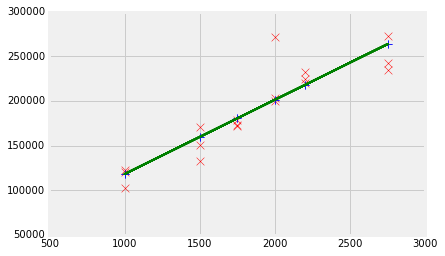

In [288]:
# Here is an example of linear regression

X = np.vstack([ 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750])
y = np.array([ 120000, 150075, 178990, 271000, 224040, 272350, 102300, 170230, 172350, 200230, 220320, 234750, 123000, 
      132300, 173250, 203700, 232200, 242750])

lm = LinearRegression()
lm.fit(X, y)

print ("Intercept:" , lm.intercept_, " Coeff: ", lm.coef_)

yp = lm.predict(X)

plt.scatter(X, y,  alpha=1, marker='x', s=60, c = 'r')
plt.scatter(X, yp, alpha=1, marker='+', s=60, c = 'b')
plt.plot(X, yp , color='g',linewidth=2)
plt.show()


In [289]:
# Concreate example of linear regression

from sklearn.datasets import load_boston


boston = load_boston()
# You can see the dcrption of the dataset by uncommenting the following line
# print (boston.DESCR)
X = boston.data
y = boston.target

df = pd.DataFrame(X, columns = boston.feature_names)
displayDFs(df)


count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.647,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970
,,,,,,,,,,,,,
,CRIM (float64),ZN (float64),INDUS (float64),CHAS (float64),NOX (float64),RM (float64),AGE (float64),DIS (float64),RAD (float64),TAX (float64),PTRATIO (float64),B (float64),LSTAT (float64)
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980


In [290]:
lm = LinearRegression()
lm.fit(X, y)
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X, y)))

# save intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + list(boston.feature_names), "Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
display(HTML(param_df.to_html()))

The R-squared value is: 0.7406 



,Features,Coef
0,intercept,36.491
1,CRIM,-0.107
2,ZN,0.046
3,INDUS,0.021
4,CHAS,2.689
5,NOX,-17.796
6,RM,3.805
7,AGE,0.001
8,DIS,-1.476
9,RAD,0.306


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ActualY,predicted,diff,bins
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000,30.008,-6.008,0 - (-16.0 - -5.25]
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600,25.030,-3.430,1 - (-5.25 - 5.5]
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700,30.570,4.130,1 - (-5.25 - 5.5]
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400,28.608,4.792,1 - (-5.25 - 5.5]
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200,27.943,8.257,2 - (5.5 - 16.25]


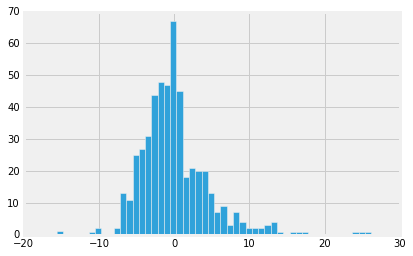

In [291]:
newX = X
newY = y

# predict and create a dataframe
predicted = lm.predict(newX)
predictedDf = pd.DataFrame({"predicted": predicted})
# dataframe for X
newXDf = pd.DataFrame(newX)
newXDf.columns = boston.feature_names
# dataframe for y
newYDf = pd.DataFrame(newY)
newYDf.columns = ['ActualY']
# join X, y and prediction
mydata_with_pd = newXDf.join(newYDf).join(predictedDf)

## ===========Lets make some bins depending on how far or close to real 
mydata_with_pd['diff'] = mydata_with_pd['ActualY'] - mydata_with_pd['predicted'] 
mydata_with_pd['diff'].hist(bins=50)

min = floor(mydata_with_pd['diff'].min())
max = ceil(mydata_with_pd['diff'].max())
nbins=5
bins = np.linspace(min, max, nbins, endpoint=True)
group_names = []
for i in arange(len(bins[1:])):
    group_names.append ("{} - ({} - {}] ".format(i, bins[i],  bins[i+1]))

mydata_with_pd['bins'] = pd.cut(mydata_with_pd['diff'], bins, labels=group_names)
mydata_with_pd['bins'] = mydata_with_pd['bins'].astype(str)

display(mydata_with_pd.head())



Dropping in prepareDF -  Index([], dtype='object')


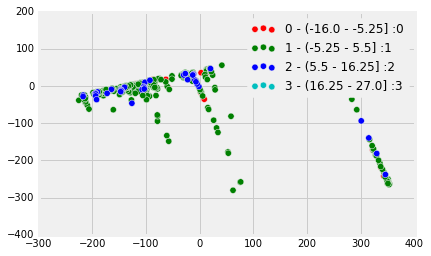

In [294]:
dfPCA=PCAPlot(mydata_with_pd, 'bins')